<a href="https://colab.research.google.com/github/chandrakanta-chaudhury/Audio_signals_Research/blob/master/Adding_noise_signal_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Data has been used from http://groups.inf.ed.ac.uk/ami/download/ 

In [0]:
!wget http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-175215-Wed-Apr-29-2020.wget.sh

--2020-04-30 05:09:45--  http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-175215-Wed-Apr-29-2020.wget.sh
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2234 (2.2K) [application/x-sh]
Saving to: ‘amiBuild-175215-Wed-Apr-29-2020.wget.sh’

amiBuild-175215-Wed 100%[===================>]   2.18K  --.-KB/s    in 0s      

2020-04-30 05:09:46 (368 MB/s) - ‘amiBuild-175215-Wed-Apr-29-2020.wget.sh’ saved [2234/2234]



In [0]:
!sh amiBuild-175215-Wed-Apr-29-2020.wget.sh

--2020-04-30 05:09:56--  http://groups.inf.ed.ac.uk/ami/AMICorpusMirror//amicorpus/ES2007a/audio/ES2007a.Array1-01.wav
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38601772 (37M) [audio/x-wav]
Saving to: ‘amicorpus/ES2007a/audio/ES2007a.Array1-01.wav’

ES2007a.Array1-01.w 100%[===================>]  36.81M  2.70MB/s    in 14s     

2020-04-30 05:10:13 (2.61 MB/s) - ‘amicorpus/ES2007a/audio/ES2007a.Array1-01.wav’ saved [38601772/38601772]

--2020-04-30 05:10:13--  http://groups.inf.ed.ac.uk/ami/AMICorpusMirror//amicorpus/ES2007a/audio/ES2007a.Array1-02.wav
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38601772 (37M) [audio/x-wav]
Saving to: ‘amicorpus/ES20

In [0]:
#checking GPU in my colab

!nvidia-smi

Thu Apr 30 05:14:18 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

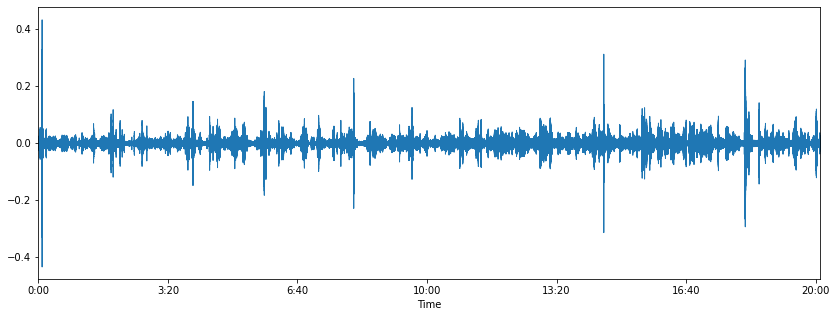

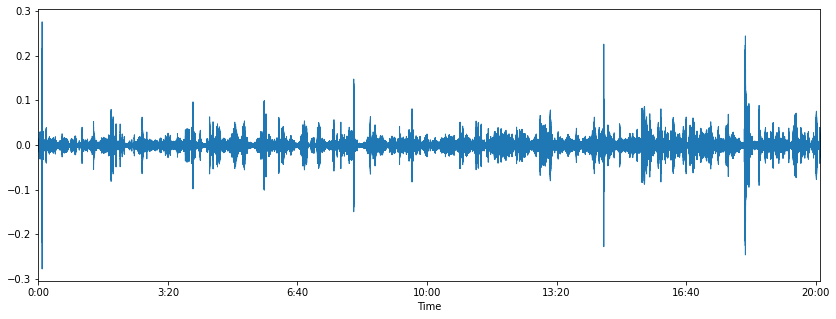

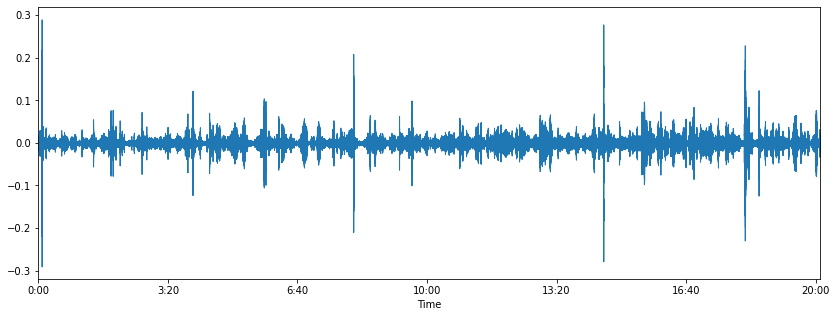

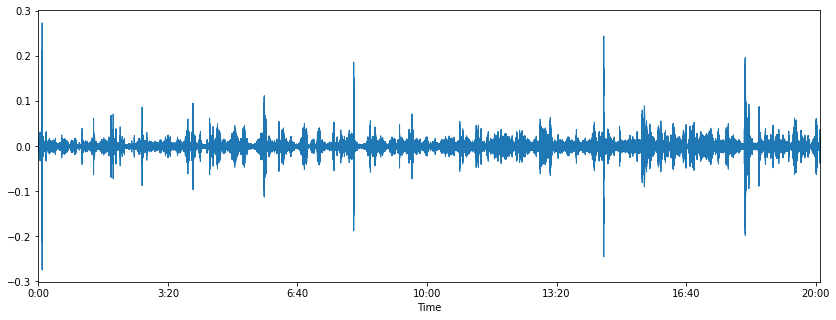

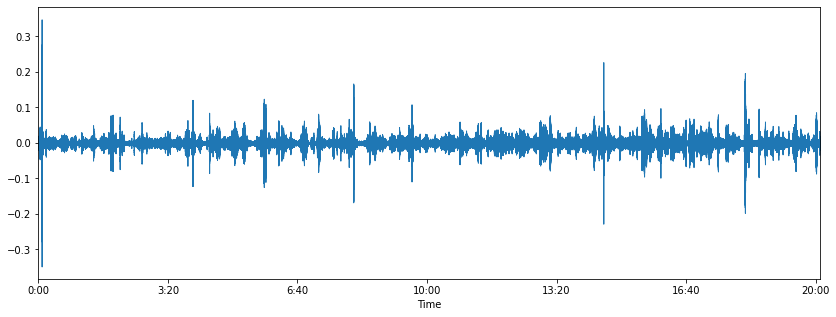

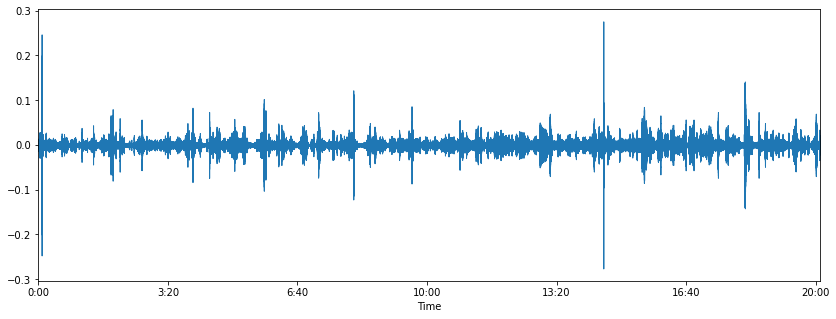

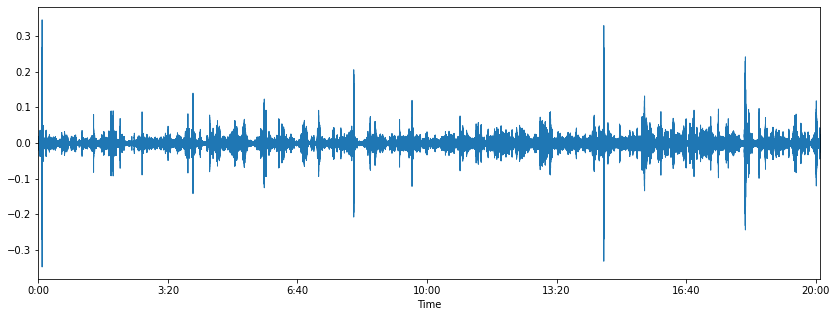

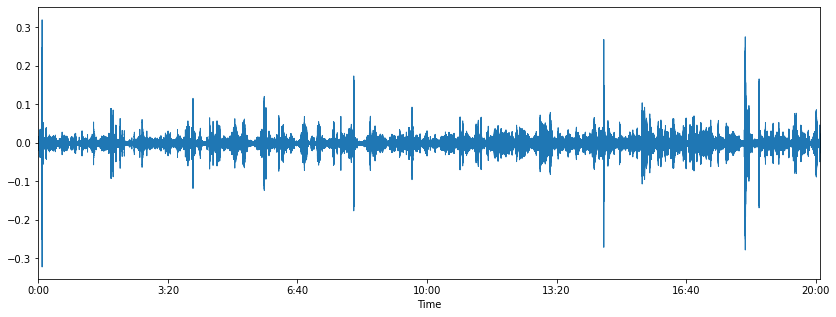

In [0]:
import librosa
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

# loop over all files in the current directory ending with .txt
for fname in glob("/content/amicorpus/ES2007a/audio/ES2007a.Array1-0*.wav"):
  x , sr = librosa.load(fname)
  import librosa.display
  plt.figure(figsize=(14, 5))
  librosa.display.waveplot(x,sr=sr)

In [0]:
x.shape

(26599004,)

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras.initializers import RandomUniform, Initializer, Constant

In [0]:
#to add noise has been referd from here 
#https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8
#given a signal and desired SNR, this gives the required AWGN what should be added to the signal to get the desired SNR
def get_white_noise(signal,SNR) :
    #RMS value of signal
    RMS_s=math.sqrt(np.mean(signal**2))
    #RMS values of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/20)))
    #Additive white gausian noise. Thereore mean=0
    #Because sample length is large (typically > 40000)
    #we can use the population formula for standard daviation.
    #because mean=0 STD=RMS
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, signal.shape[0])
    return noise

In [0]:
import math
signal=np.interp(x, (x.min(), x.max()), (-1, 1))
noise=get_white_noise(signal,SNR=10)

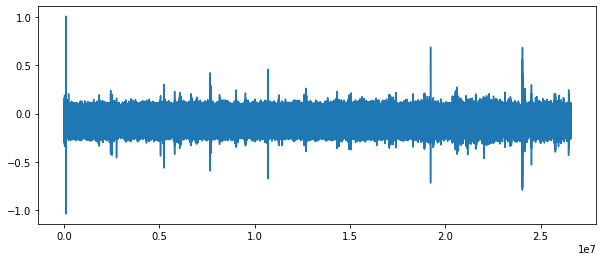

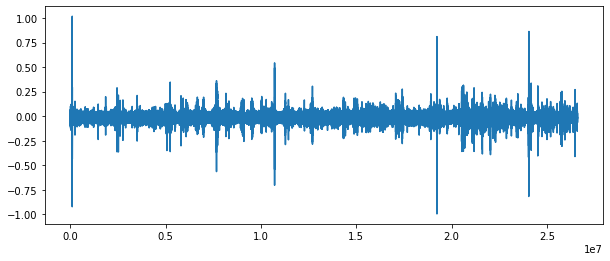

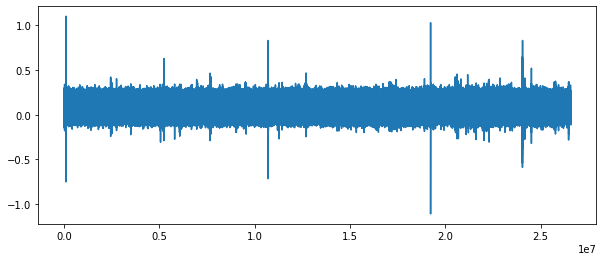

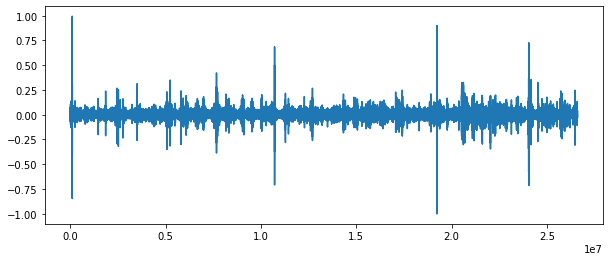

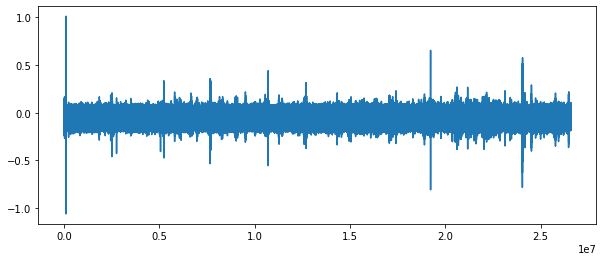

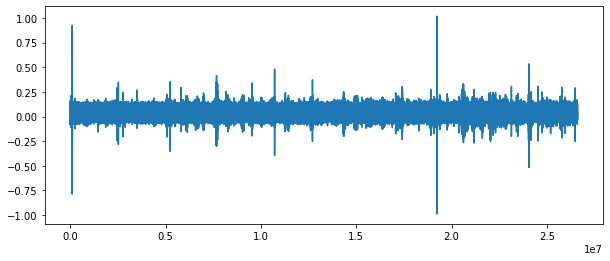

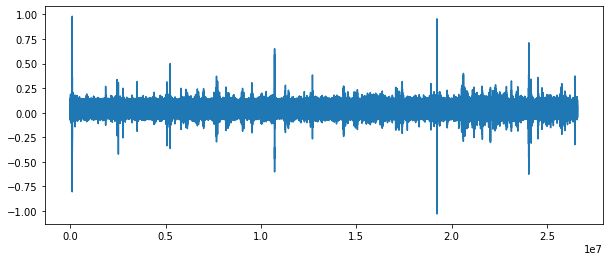

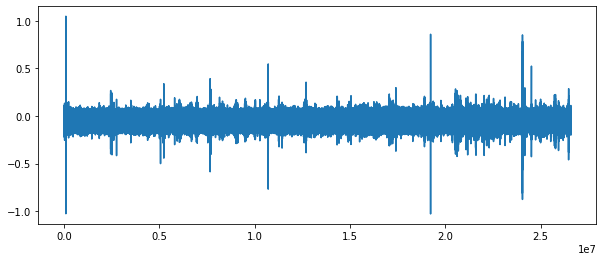

In [0]:
##for all signals with added noise plotting 
from glob import glob
X = []
pad = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
import matplotlib.pyplot as plt
for fname in glob("/content/amicorpus/ES2007a/audio/ES2007a.Array1-0*.wav"):
  x , sr = librosa.load(fname)
  signal=np.interp(x, (x.min(), x.max()), (-1, 1))
  noise=get_white_noise(signal,SNR=10)
  signal_noise=signal+noise
  padded = pad(signal_noise, 3000)
  X.append(padded)
  fig, ax = plt.subplots(figsize=(10,4))
  ax.plot(signal_noise)
  #plt.plot(signal_noise)
  

In [0]:
#add the signal to noise for one of the signal
#signal_noise=signal+noise

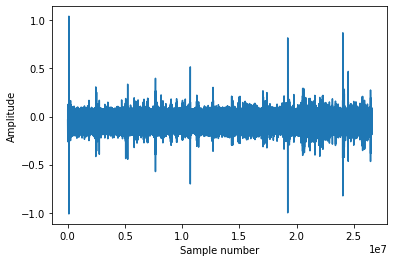

In [0]:
#plotting a single  noise added signal
import matplotlib.pyplot as plt
plt.plot(signal_noise)
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.show()

In [0]:
X=np.vstack(X)

In [0]:
# type(signal_noise)
X.shape

(8, 3000)

In [0]:
#X=signal_noise.reshape((1,26599004))

In [0]:
#X.shape

(1, 26599004)

In [0]:
#as system getting crashed due to the array size 
#X1=signal_noise[-3000:]
#X=X1.reshape((1,3000))

In [0]:
#X.shape

(1, 3000)

In [0]:
#use RBFN to denise 
#new way RBF 
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [0]:

from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(Flatten(input_shape=(1,X.shape[1])))
model.add(RBFLayer(100, 0.5))

In [0]:
model.add(RBFLayer(3000, 0.5))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3000)              0         
_________________________________________________________________
rbf_layer (RBFLayer)         (None, 100)               300000    
_________________________________________________________________
rbf_layer_1 (RBFLayer)       (None, 3000)              300000    
Total params: 600,000
Trainable params: 600,000
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
#cmmenting as i have only single signal file to check the model , so training and test i kept same
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.2)

In [0]:
X_train.shape,X_test.shape

((6, 3000), (2, 3000))

In [0]:
model.fit(X_train,X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
1/1 [==============================] - 0s 151ms/step - loss: 2.2613 - val_loss: 3.1138
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 2.1922 - val_loss: 3.0596
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 2.1264 - val_loss: 3.0065
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 2.0640 - val_loss: 2.9544
Epoch 5/100
1/1 [==============================] - 0s 29ms/step - loss: 2.0046 - val_loss: 2.9036
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 1.9479 - val_loss: 2.8539
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 1.8935 - val_loss: 2.8054
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 1.8409 - val_loss: 2.7582
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 1.7897 - val_loss: 2.7122
Epoch 10/100
1/1 [==============================] - 0s 26ms/step - loss: 1.7396 - val_loss: 2.6674
Epoch 11/100
1/1 [

In [0]:
#y=X.reshape(1,1,3000)
y=model.predict(X_test)
  

In [0]:
y.shape,
print(y)

[[0.65019816 0.65699166 0.6505881  ... 0.6572374  0.65129614 0.65235484]
 [0.6446978  0.6568449  0.649935   ... 0.65542156 0.6515841  0.6505631 ]]


In [0]:
for i in range(y.shape[0]):
  #give full path here before file_  ex - give local path of ur system if needed
  f = open("file_"+str(i)+".wav","wb")
  data=y[i]
  librosa.output.write_wav(f,data,sr=sr)

/content/file_1.wav
/content/file_0.wav


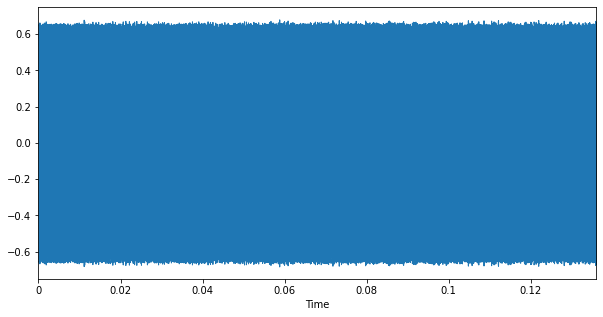

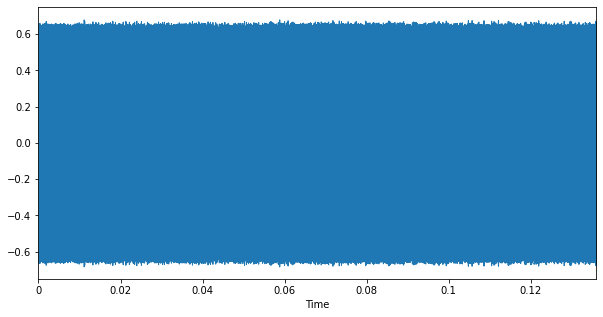

In [0]:
#after removing noise using RBF natwork this is cleanded signals for 2 test wav signal files
import librosa
import librosa.display
#librosa.display.waveplot(y,sr=sr)
#change path here if u r having local path , wherever ur file is 
for fname in glob("/content/file_*.wav"):
  print(fname)
  x1 , sr = librosa.load(fname)
  plt.figure(figsize=(10, 5))
  librosa.display.waveplot(x1,sr=sr)